# ***Preprocessing***
### In this section, preprocessing will be performed to:
 1. Remove categorical data
 2. Fill in n.a values

In [54]:
import pandas as pd

# Read the dataset
afl_stats = pd.read_csv('AFL-2022-totals.csv')

# Replace NaN values with 0
afl_stats.fillna(0, inplace=True)

categorical_data = ['Player', 'TM']

# Remove categorical data
afl_stats = afl_stats.drop(categorical_data, axis=1)

afl_stats

,GM,KI,MK,HB,DI,GL,BH,HO,TK,RB,...,FF,FA,BR,CP,UP,CM,MI,1%,BO,GA
0,23,344.0,82.0,409.0,753.0,5.0,8.0,0.0,126.0,42.0,...,36.0,27.0,25.0,409.0,358.0,1.0,1.0,40.0,3.0,19.0
1,25,346.0,96.0,403.0,749.0,11.0,8.0,0.0,113.0,39.0,...,44.0,23.0,28.0,400.0,350.0,7.0,7.0,24.0,13.0,14.0
2,23,342.0,96.0,363.0,705.0,4.0,4.0,0.0,87.0,40.0,...,32.0,17.0,11.0,267.0,460.0,2.0,3.0,50.0,4.0,18.0
3,24,354.0,112.0,350.0,704.0,12.0,12.0,0.0,149.0,51.0,...,35.0,31.0,25.0,217.0,473.0,1.0,5.0,44.0,4.0,11.0
4,24,357.0,100.0,316.0,673.0,19.0,31.0,0.0,75.0,35.0,...,16.0,17.0,24.0,305.0,376.0,4.0,19.0,16.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
680,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
681,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
import numpy as np

def find_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

outliers = {}
for col in afl_stats.columns:
    if np.issubdtype(afl_stats[col].dtype, np.number):
        outliers[col] = find_outliers(afl_stats[col])


for col, outlier_vals in outliers.items():
    print(f"Outliers in column '{col}':")
    print(outlier_vals)

Outliers in column 'GM':
Series([], Name: GM, dtype: int64)
Outliers in column 'KI':
33    444.0
Name: KI, dtype: float64
Outliers in column 'MK':
42    190.0
Name: MK, dtype: float64
Outliers in column 'HB':
0     409.0
1     403.0
2     363.0
3     350.0
4     316.0
5     375.0
6     283.0
7     370.0
8     356.0
9     253.0
11    297.0
13    291.0
17    332.0
18    298.0
19    280.0
21    365.0
22    350.0
23    271.0
24    312.0
25    309.0
26    275.0
27    301.0
29    309.0
30    312.0
31    265.0
34    281.0
35    278.0
38    290.0
44    255.0
51    289.0
52    262.0
56    280.0
60    279.0
62    261.0
98    257.0
Name: HB, dtype: float64
Outliers in column 'DI':
0    753.0
1    749.0
2    705.0
3    704.0
Name: DI, dtype: float64
Outliers in column 'GL':
48     24.0
84     26.0
110    37.0
113    49.0
121    43.0
       ... 
360    33.0
371    23.0
375    35.0
413    37.0
427    23.0
Name: GL, Length: 61, dtype: float64
Outliers in column 'BH':
4      31.0
20     18.0
37     24

## Data Normalization

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a new dataframe for normalized data
normalised_stats = afl_stats.copy()

# Normalize the selected columns
normalised_stats[afl_stats.columns] = scaler.fit_transform(normalised_stats[afl_stats.columns])

normalised_stats

,GM,KI,MK,HB,DI,GL,BH,HO,TK,RB,...,FF,FA,BR,CP,UP,CM,MI,1%,BO,GA
0,0.916667,0.774775,0.431579,1.000000,1.000000,0.074627,0.186047,0.0,0.736842,0.234637,...,0.750000,0.450000,0.862069,1.000000,0.756871,0.016129,0.010417,0.162602,0.026549,0.678571
1,1.000000,0.779279,0.505263,0.985330,0.994688,0.164179,0.186047,0.0,0.660819,0.217877,...,0.916667,0.383333,0.965517,0.977995,0.739958,0.112903,0.072917,0.097561,0.115044,0.500000
2,0.916667,0.770270,0.505263,0.887531,0.936255,0.059701,0.093023,0.0,0.508772,0.223464,...,0.666667,0.283333,0.379310,0.652812,0.972516,0.032258,0.031250,0.203252,0.035398,0.642857
3,0.958333,0.797297,0.589474,0.855746,0.934927,0.179104,0.279070,0.0,0.871345,0.284916,...,0.729167,0.516667,0.862069,0.530562,1.000000,0.016129,0.052083,0.178862,0.035398,0.392857
4,0.958333,0.804054,0.526316,0.772616,0.893758,0.283582,0.720930,0.0,0.438596,0.195531,...,0.333333,0.283333,0.827586,0.745721,0.794926,0.064516,0.197917,0.065041,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Preliminary Plots for Exploratory Data Analysis

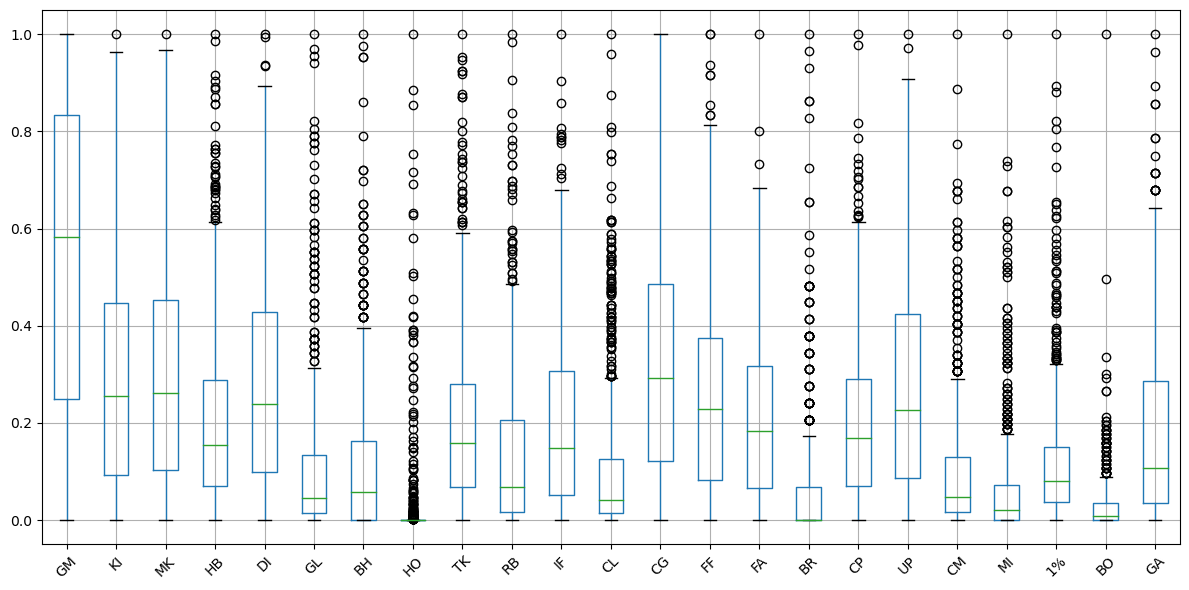

In [57]:
import matplotlib.pyplot as plt

# Create box plots for each column
normalised_stats.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

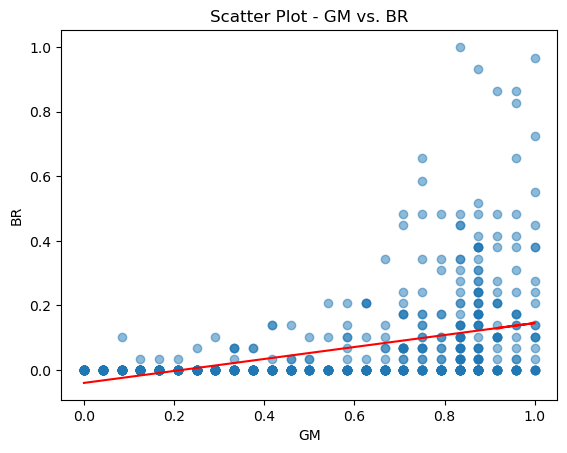

GM - Pearson Correlation: 0.4185217395869355, p-value: 2.1989862325791797e-30


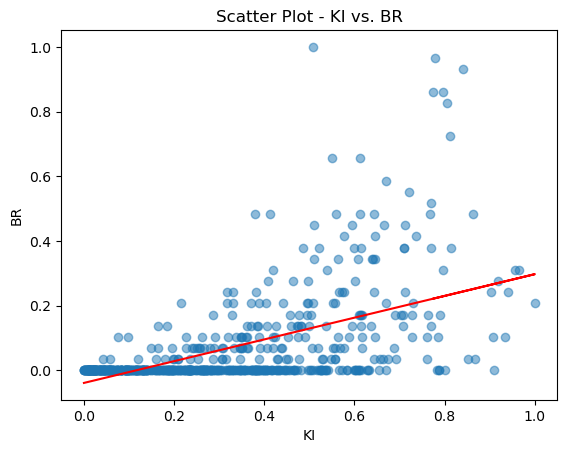

KI - Pearson Correlation: 0.5612756877207197, p-value: 4.9917813922309205e-58


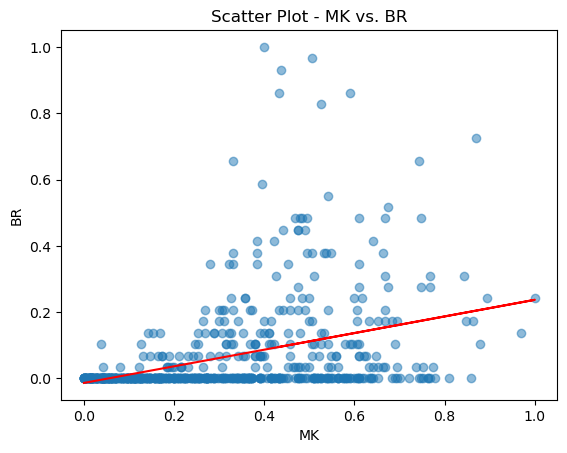

MK - Pearson Correlation: 0.39759973153004174, p-value: 2.5032286237038713e-27


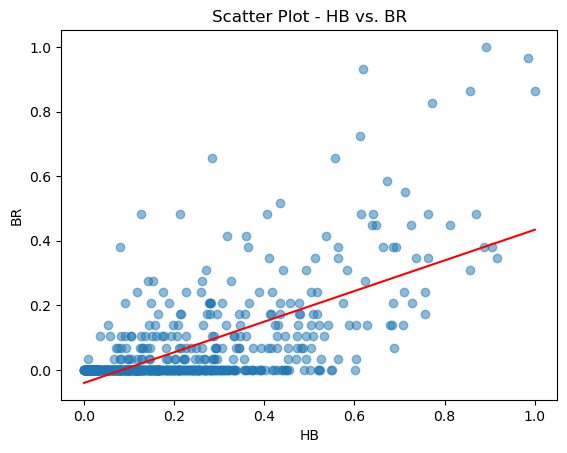

HB - Pearson Correlation: 0.6596375159102728, p-value: 1.2061279704411055e-86


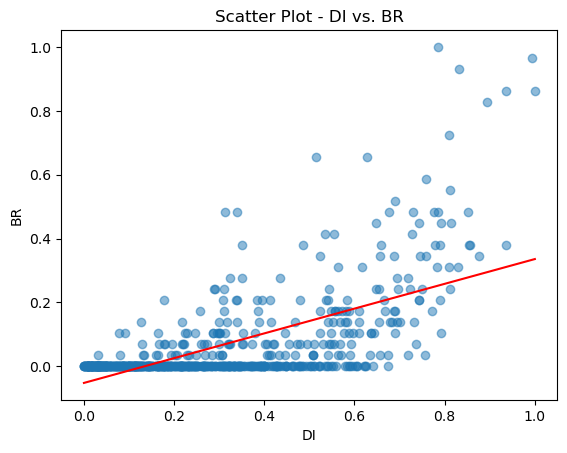

DI - Pearson Correlation: 0.6382401843332588, p-value: 1.5961324040431752e-79


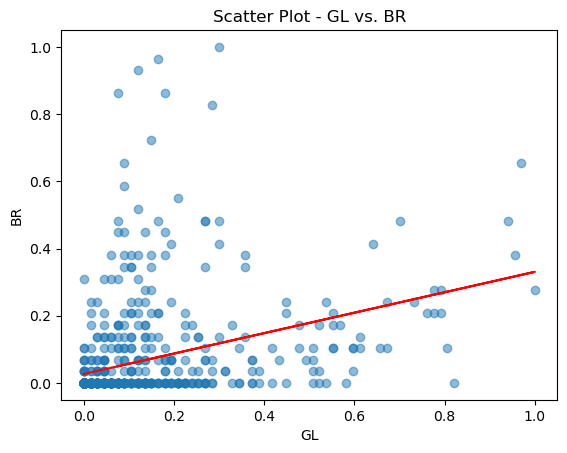

GL - Pearson Correlation: 0.36513472513678114, p-value: 5.341562310818171e-23


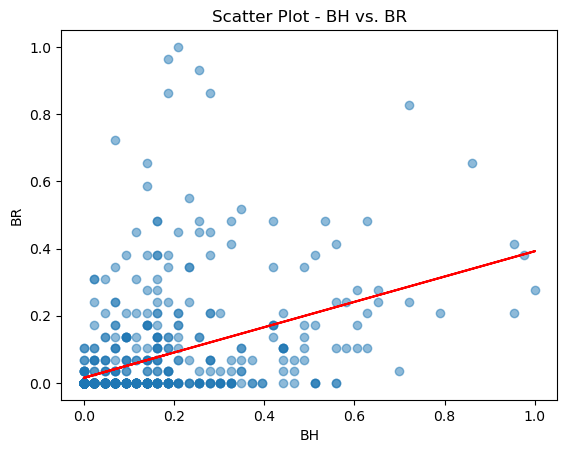

BH - Pearson Correlation: 0.44397438463273176, p-value: 2.0993953211528726e-34


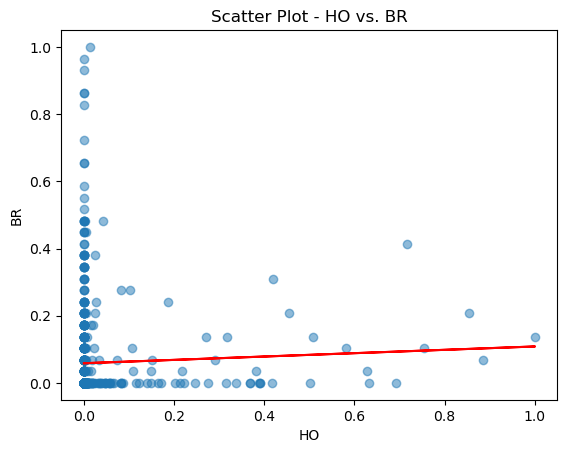

HO - Pearson Correlation: 0.03854933304189334, p-value: 0.31406642202952173


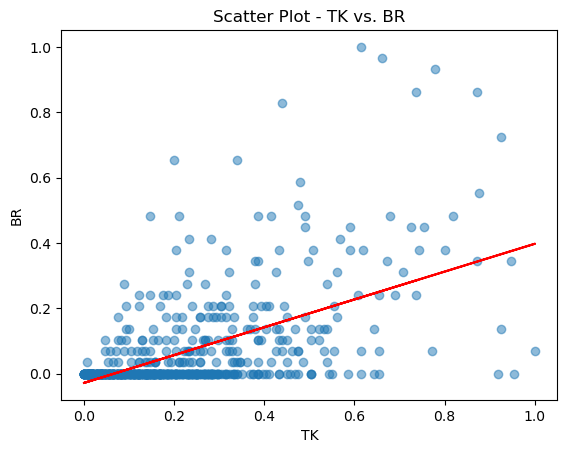

TK - Pearson Correlation: 0.5721356567001554, p-value: 1.0105763871372177e-60


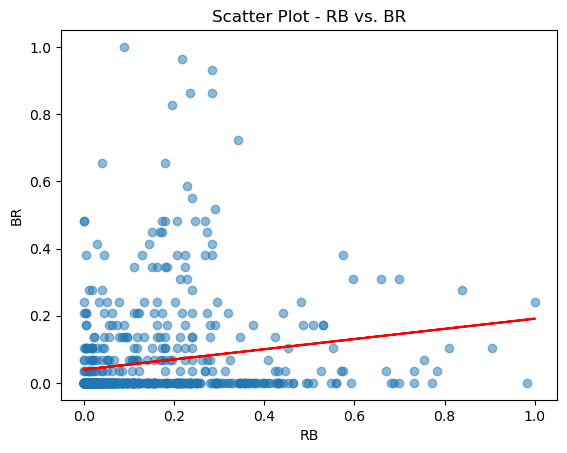

RB - Pearson Correlation: 0.1823790173670676, p-value: 1.5753511442245965e-06


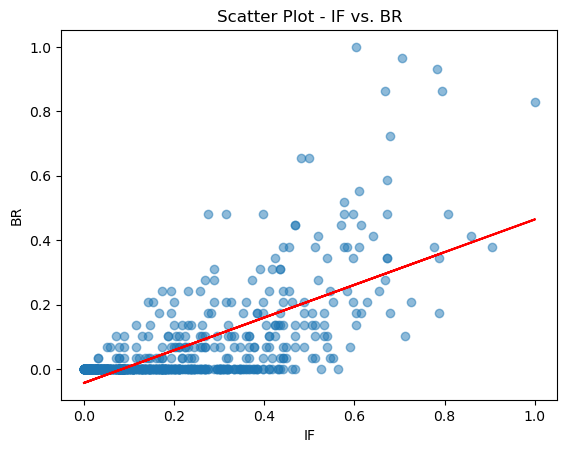

IF - Pearson Correlation: 0.6862140792675882, p-value: 2.3821033807285983e-96


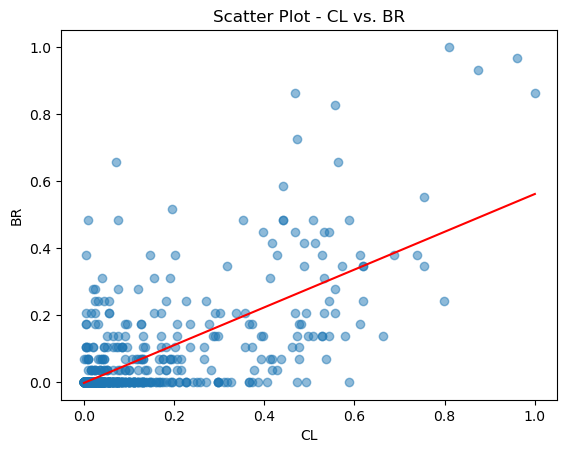

CL - Pearson Correlation: 0.6842234822917909, p-value: 1.3797445955910942e-95


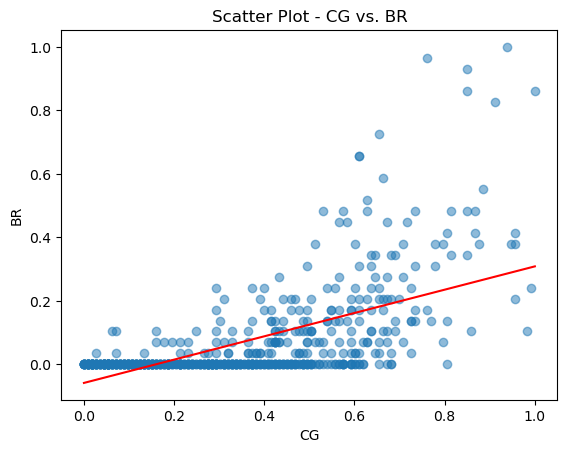

CG - Pearson Correlation: 0.6173584486158417, p-value: 4.2499536527524025e-73


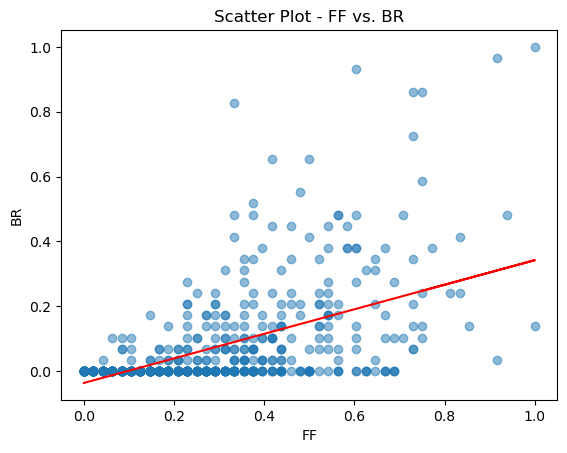

FF - Pearson Correlation: 0.5597233510673185, p-value: 1.189062475631459e-57


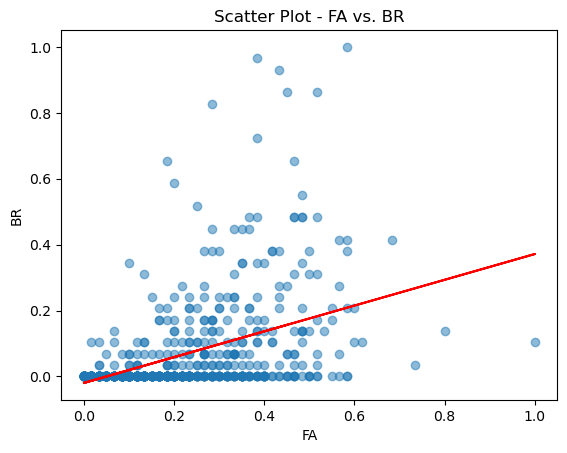

FA - Pearson Correlation: 0.45150165900009503, p-value: 1.1650577282803337e-35


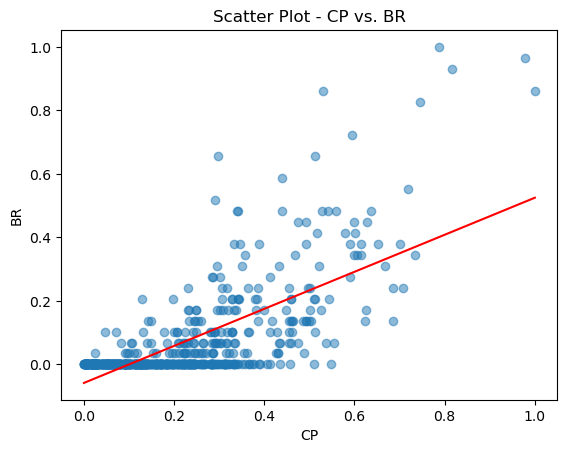

CP - Pearson Correlation: 0.7087758596103367, p-value: 1.90943995919781e-105


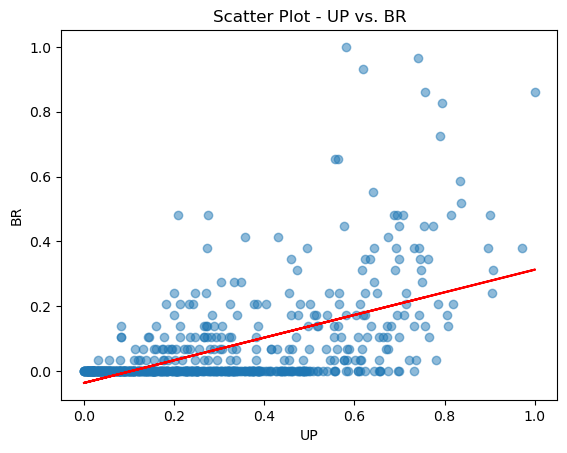

UP - Pearson Correlation: 0.5692920452953465, p-value: 5.243151900490152e-60


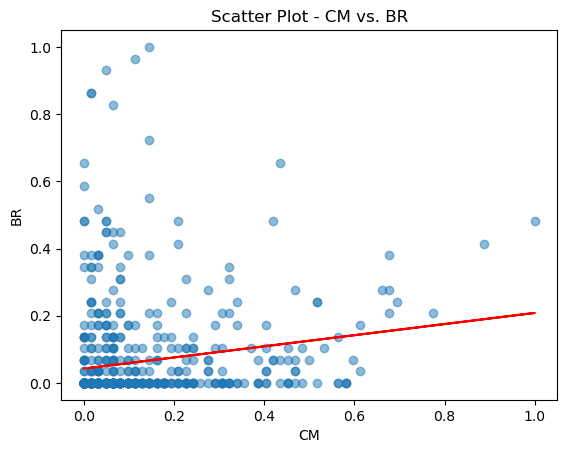

CM - Pearson Correlation: 0.17484358199652947, p-value: 4.227604011356551e-06


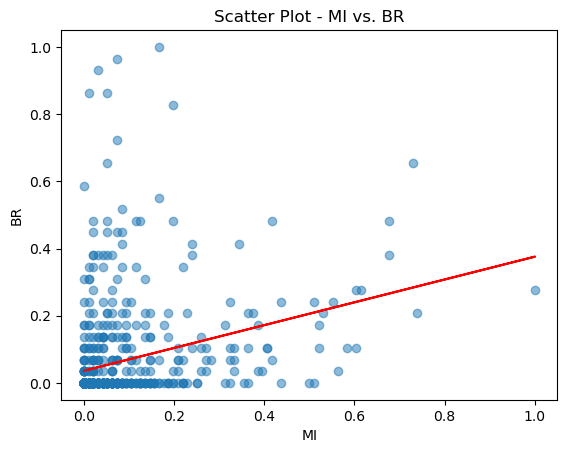

MI - Pearson Correlation: 0.29816087091821797, p-value: 1.6451099400492812e-15


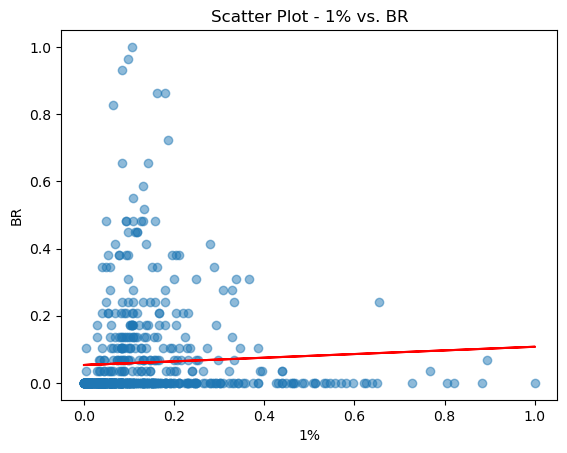

1% - Pearson Correlation: 0.05490395675059268, p-value: 0.1514637084293776


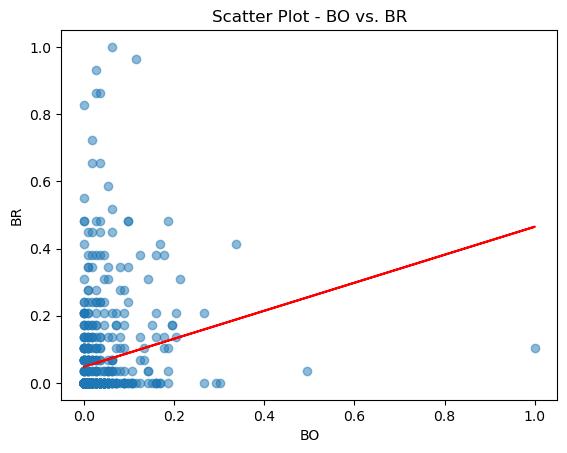

BO - Pearson Correlation: 0.18580249542350713, p-value: 9.923602776169043e-07


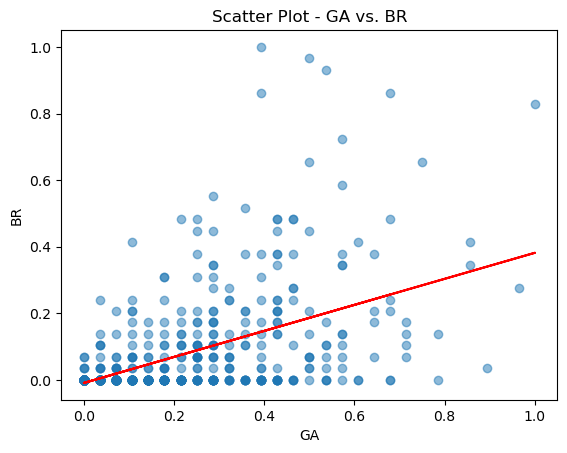

GA - Pearson Correlation: 0.5320728543528972, p-value: 2.940259956714197e-51


In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

target_var = 'BR'
X = normalised_stats.drop(target_var, axis=1)
y = normalised_stats['BR']
pc_score = {}

# Iterate through each column (predictor variable) in the DataFrame
for column in X.columns:
    X_col = X[column]

    # Scatter plot
    plt.scatter(X_col, y, alpha=0.5)

    # Linear regression line
    m, b = np.polyfit(X_col, y, 1)  # Fit a linear regression line
    plt.plot(X_col, m*X_col + b, color='red')

    plt.xlabel(column)
    plt.ylabel('BR')
    plt.title(f'Scatter Plot - {column} vs. BR')
    plt.show()

    # Calculate Pearson correlation coefficient and p-value
    correlation, p_value = pearsonr(X_col, y)
    pc_score[column] = (correlation, p_value)
    print(f'{column} - Pearson Correlation: {correlation}, p-value: {p_value}')

In [59]:
pc_score = dict(sorted(pc_score.items(), key=lambda x: -x[1][0]))
i = 1
for feature, score in list(pc_score.items()):
    print(f'{i}. {feature} - PC: {score[0]}, p-value: {score[1]}')
    i += 1

1. CP - PC: 0.7087758596103367, p-value: 1.90943995919781e-105
2. IF - PC: 0.6862140792675882, p-value: 2.3821033807285983e-96
3. CL - PC: 0.6842234822917909, p-value: 1.3797445955910942e-95
4. HB - PC: 0.6596375159102728, p-value: 1.2061279704411055e-86
5. DI - PC: 0.6382401843332588, p-value: 1.5961324040431752e-79
6. CG - PC: 0.6173584486158417, p-value: 4.2499536527524025e-73
7. TK - PC: 0.5721356567001554, p-value: 1.0105763871372177e-60
8. UP - PC: 0.5692920452953465, p-value: 5.243151900490152e-60
9. KI - PC: 0.5612756877207197, p-value: 4.9917813922309205e-58
10. FF - PC: 0.5597233510673185, p-value: 1.189062475631459e-57
11. GA - PC: 0.5320728543528972, p-value: 2.940259956714197e-51
12. FA - PC: 0.45150165900009503, p-value: 1.1650577282803337e-35
13. BH - PC: 0.44397438463273176, p-value: 2.0993953211528726e-34
14. GM - PC: 0.4185217395869355, p-value: 2.1989862325791797e-30
15. MK - PC: 0.39759973153004174, p-value: 2.5032286237038713e-27
16. GL - PC: 0.36513472513678114, p

## Correlation Matrix Heatmap to check for Multicollinearity

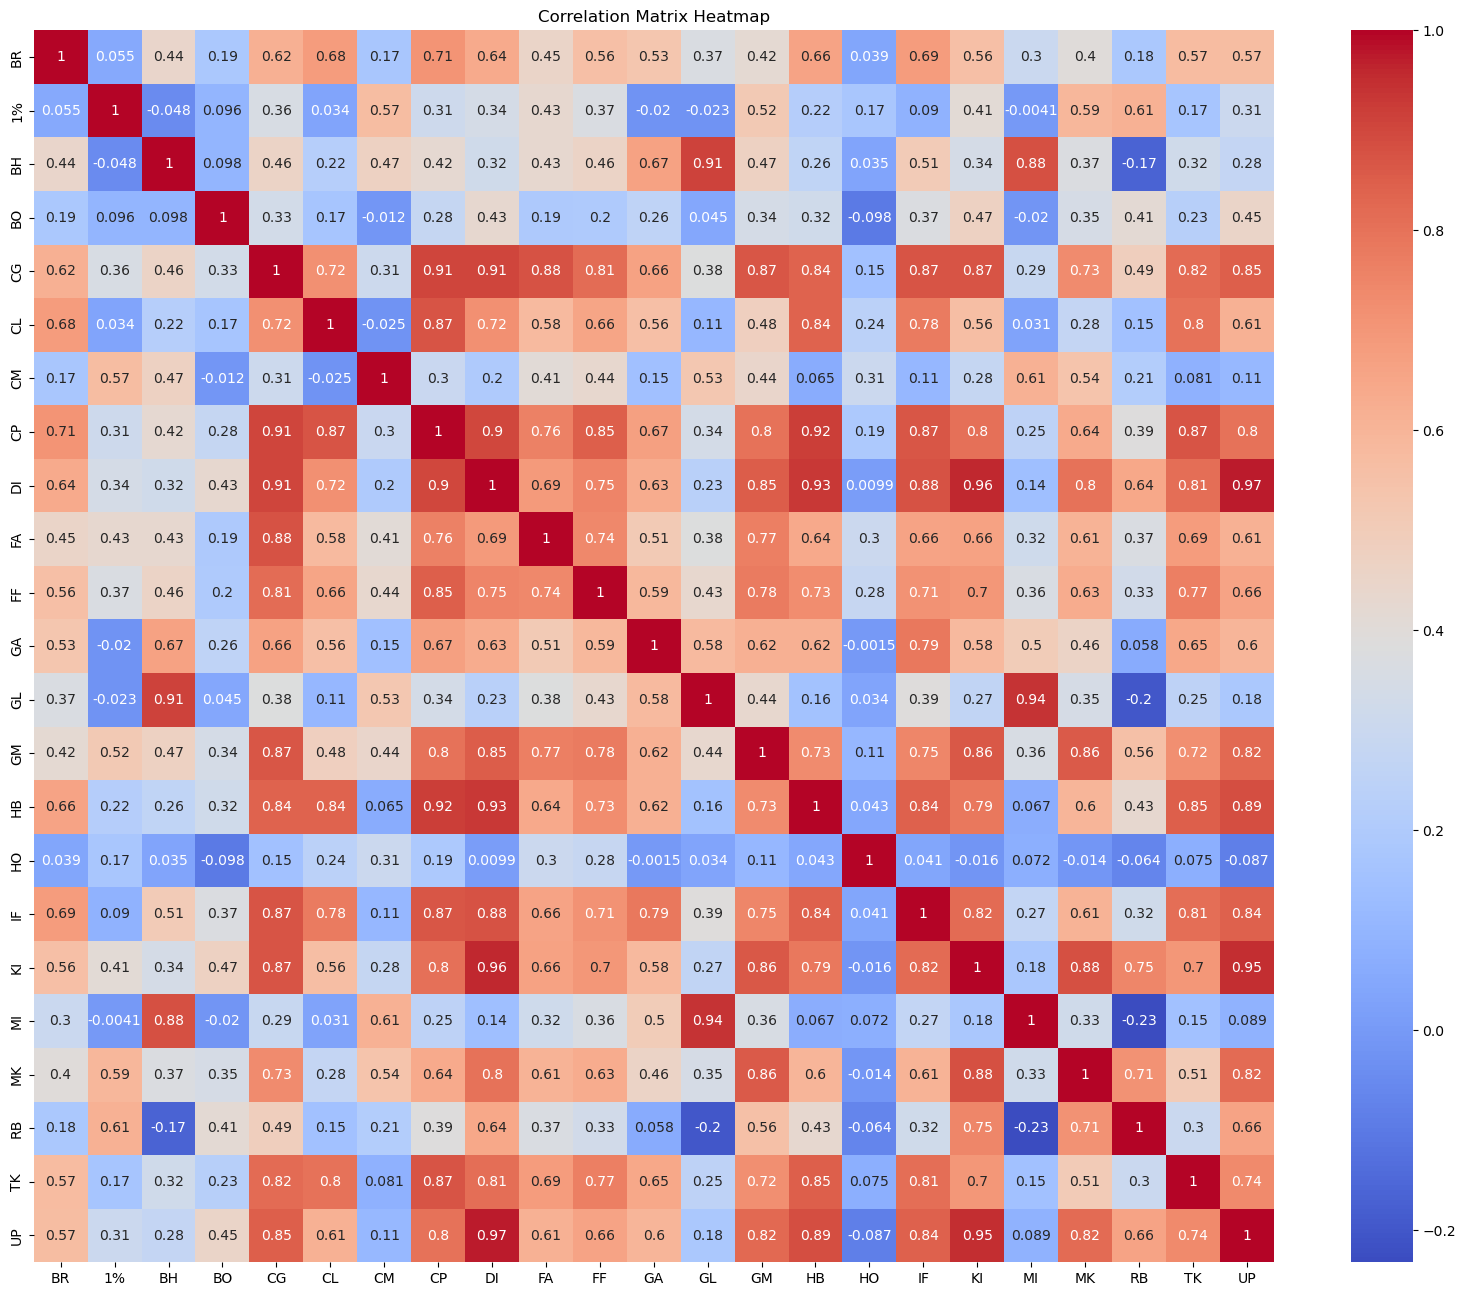

In [60]:
import seaborn as sns

column_name = 'BR'
corr_df = normalised_stats[[column_name] + list(normalised_stats.columns.difference([column_name]))]

correlation_matrix = corr_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Multiple Linear Regression 1 (Before removal of variables causing Multicollinearity)

R2 (Fold 1 ): 0.6122580803076171
R2 (Fold 2 ): 0.5237114586213151
R2 (Fold 3 ): 0.5730296652644143
R2 (Fold 4 ): 0.6836889354380025
R2 (Fold 5 ): 0.5308282154505433
R2 (Fold 6 ): 0.6262047556180967
R2 (Fold 7 ): 0.6935836868907339
R2 (Fold 8 ): 0.24615482714956127
R2 (Fold 9 ): 0.6256389301093684
R2 (Fold 10 ): 0.6989905833509964
MSE (Cross-validation): 0.007029194339881181
R2 (Cross-validation): 0.5814089138200649


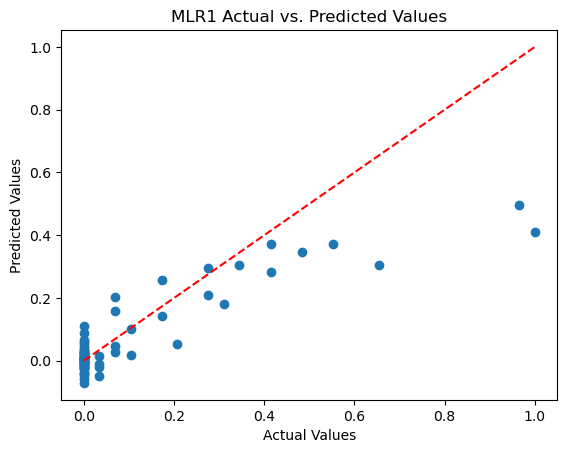

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

pc_score = dict(sorted(pc_score.items(), key=lambda x: -x[1][0]))
top_features = list(pc_score.keys())

model = LinearRegression()

nf_CV = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

fold = 1  

for train_idx, test_idx in nf_CV.split(X):
    # Train-test split
    X_train, X_test = X.iloc[train_idx][top_features], X.iloc[test_idx][top_features]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train a linear regression model on the column of X against y
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_LR1 = model.predict(X_test)

    # Calculate the MSE and R2 score on the test data
    mse_test = mean_squared_error(y_test, y_pred_LR1)
    r2_test = r2_score(y_test, y_pred_LR1)

    
    mse_scores.append(mse_test)
    r2_scores.append(r2_test)

    
    print("R2 (Fold", fold, "):", r2_test)

    fold += 1  

cv_mse_scores = np.array(mse_scores)
cv_r2_scores = np.array(r2_scores)

# Calculate the average MSE and R2 scores
mse_mean = cv_mse_scores.mean()
r2_mean = cv_r2_scores.mean()

print("MSE (Cross-validation):", mse_mean)
print("R2 (Cross-validation):", r2_mean)

# Plot the linear regression
plt.scatter(y_test, y_pred_LR1)  # actual values
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MLR1 Actual vs. Predicted Values')
plt.show()


## Minimisation of Multicollinearity, Mutiple Linear Regression 2 (Post-removal)

R2 (Fold 1 ): 0.6108873536723312
R2 (Fold 2 ): 0.5383788445674877
R2 (Fold 3 ): 0.6223657591677128
R2 (Fold 4 ): 0.7008606972769972
R2 (Fold 5 ): 0.5063790085690454
R2 (Fold 6 ): 0.6288095112695327
R2 (Fold 7 ): 0.6693067731242857
R2 (Fold 8 ): 0.3147085330107696
R2 (Fold 9 ): 0.6240697001742053
R2 (Fold 10 ): 0.709839234194576
MSE: 0.00686825015436075
R2: 0.5925605415026943


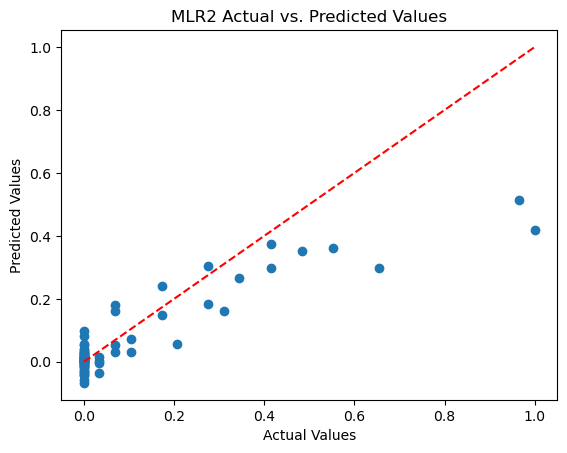

In [62]:
top_features = list(pc_score.keys())[:20]
top_features.remove('IF')
top_features.remove('CG')
top_features.remove('FF')
top_features.remove('FA')

mse_scores = []
r2_scores = []
fold = 1

for train_idx, test_idx in nf_CV.split(X):
    # Train-test split
    X_train, X_test = X.iloc[train_idx][top_features], X.iloc[test_idx][top_features]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train a linear regression model on the column of X against y
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_LR2 = model.predict(X_test)

    # Calculate the MSE and R2 score on the test data
    mse_test = mean_squared_error(y_test, y_pred_LR2)
    r2_test = r2_score(y_test, y_pred_LR2)

   
    mse_scores.append(mse_test)
    r2_scores.append(r2_test)

    
    print("R2 (Fold", fold, "):", r2_test)

    fold += 1  


cv_mse_scores = np.array(mse_scores)
cv_r2_scores = np.array(r2_scores)

# Calculate the average MSE and R2 scores
mse_mean = cv_mse_scores.mean()
r2_mean = cv_r2_scores.mean()


print("MSE:", mse_mean)
print("R2:", r2_mean)

# Plot the linear regression
plt.scatter(y_test, y_pred_LR2)  # actual values
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MLR2 Actual vs. Predicted Values')
plt.show()


# Residual Plot to verify multiple linear regressions

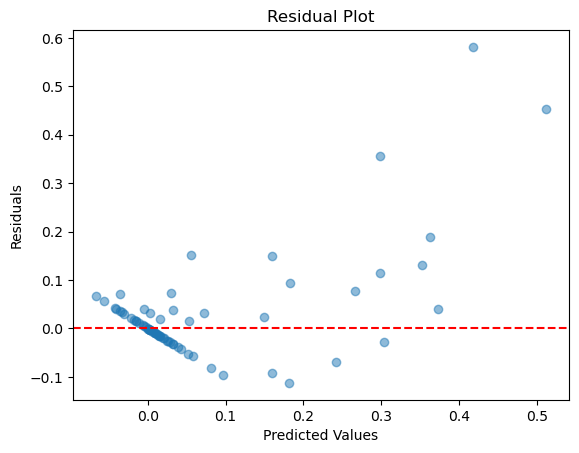

In [63]:
residuals = y_test - y_pred_LR2


plt.scatter(y_pred_LR2, residuals, alpha=0.5)


plt.axhline(y=0, color='r', linestyle='--')


plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

# Random Forest Regression

R2 (Fold 1 ): 0.6571521228467023
R2 (Fold 2 ): 0.5000148671972386
R2 (Fold 3 ): 0.6639464285714285
R2 (Fold 4 ): 0.8257431637519874
R2 (Fold 5 ): 0.6242407155165342
R2 (Fold 6 ): 0.7243353628564806
R2 (Fold 7 ): 0.7464180921976757
R2 (Fold 8 ): 0.4388290079852578
R2 (Fold 9 ): 0.7110827812281113
R2 (Fold 10 ): 0.7389908190695791
MSE (Cross-validation): 0.005595245470571001
R2 (Cross-validation): 0.6630753361220995
Feature Importance:
1. DI: 0.3738206600231255
2. CP: 0.1834832902132079
3. IF: 0.07256037725391064
4. HB: 0.058237994896959695
5. KI: 0.050205788058136455
6. BH: 0.049868812591732155
7. GL: 0.02736922970332787
8. TK: 0.02423194323742287
9. CL: 0.01782594216641099
10. CG: 0.01619137443150096
11. FF: 0.01596693427498936
12. UP: 0.015645102753224924
13. FA: 0.015396265043374708
14. MI: 0.012755734973327484
15. RB: 0.011834357574927803
16. GM: 0.010982498332705813
17. MK: 0.01087284665641784
18. GA: 0.009786624446824176
19. BO: 0.0075815721393904575
20. 1%: 0.00699914892834068
21

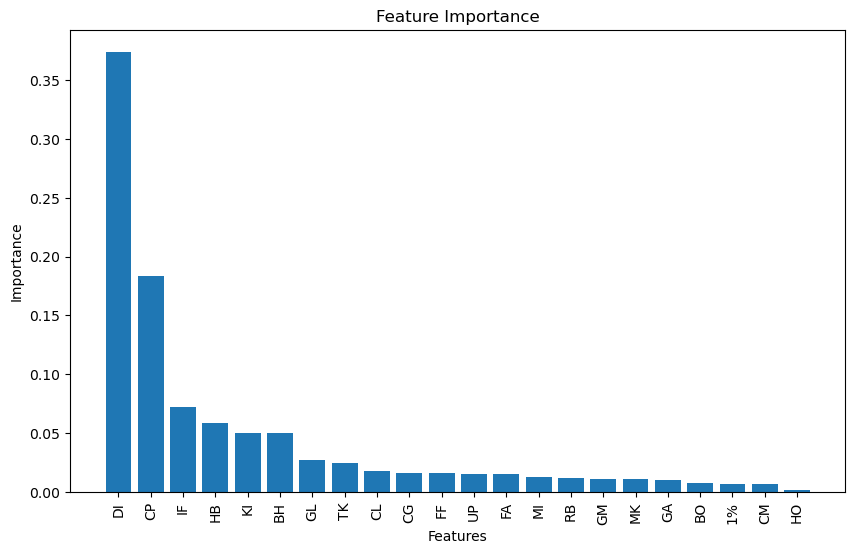

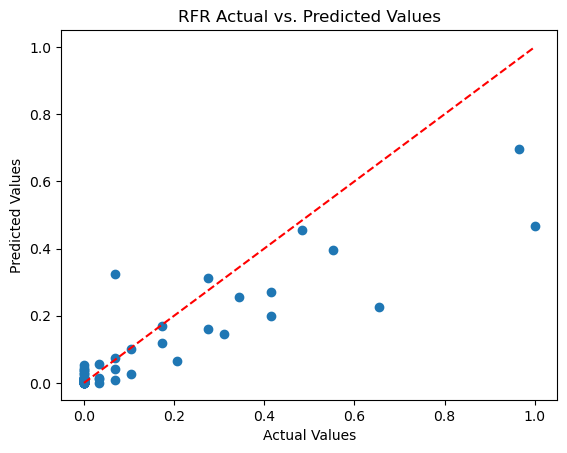

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

target_var = 'BR'
X = normalised_stats.drop(target_var, axis=1)
y = normalised_stats['BR']

pc_score = dict(sorted(pc_score.items(), key=lambda x: -x[1][0]))
top_features = list(pc_score.keys())


model = RandomForestRegressor()
nf_CV = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

fold = 1  

for train_idx, test_idx in nf_CV.split(X):
    # Train-test split
    X_train, X_test = X.iloc[train_idx][top_features], X.iloc[test_idx][top_features]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train a Random Forest model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_RFR = model.predict(X_test)

    # Calculate the MSE and R2 score on the test data
    mse_test = mean_squared_error(y_test, y_pred_RFR)
    r2_test = r2_score(y_test, y_pred_RFR)

   
    mse_scores.append(mse_test)
    r2_scores.append(r2_test)

    
    print("R2 (Fold", fold, "):", r2_test)

    fold += 1  


cv_mse_scores = np.array(mse_scores)
cv_r2_scores = np.array(r2_scores)

# Calculate the average MSE and R2 scores
mse_mean = cv_mse_scores.mean()
r2_mean = cv_r2_scores.mean()


print("MSE (Cross-validation):", mse_mean)
print("R2 (Cross-validation):", r2_mean)

# Get feature importance scores
importance = model.feature_importances_

# Sort the feature importance in descending order
sorted_indices = importance.argsort()[::-1]
sorted_importance = importance[sorted_indices]
sorted_features = np.array(top_features)[sorted_indices]

# Print the feature names and their corresponding importance scores
print("Feature Importance:")
for i, feature_index in enumerate(sorted_indices):
    print(f"{i+1}. {top_features[feature_index]}: {sorted_importance[i]}")

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importance, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred_RFR) # actual values
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RFR Actual vs. Predicted Values')
plt.show()


# Regression Tree

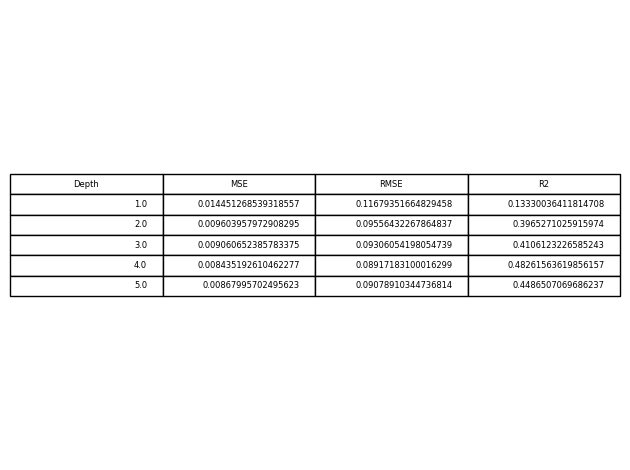

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

MSE_lst = []
RMSE_lst = []
R2_lst = []
depth_lst = []

for i in range(1,6):
    current_depth_MSE = []
    current_depth_RMSE = []
    current_depth_R2 = []
    for train_idx, test_idx in nf_CV.split(X):
        # Train-test split
        X_train, X_test = X.iloc[train_idx][top_features], X.iloc[test_idx][top_features]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Create a decision tree regressor
        regressor = DecisionTreeRegressor(random_state=42, max_depth= i)
    
        # Train the model on the training data
        regressor.fit(X_train, y_train)
    
        # Make predictions on the testing data
        y_pred = regressor.predict(X_test)
    
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        current_depth_MSE.append(mse)
        current_depth_RMSE.append(rmse)
        current_depth_R2.append(r2)
    
    # find mean errors at current depth
    average_MSE = sum(current_depth_MSE) / len(current_depth_MSE)
    average_RMSE = sum(current_depth_RMSE) / len(current_depth_RMSE)
    average_R2 = sum(current_depth_R2) / len(current_depth_R2)
    # append to list of errors
    MSE_lst.append(average_MSE)
    RMSE_lst.append(average_RMSE)
    R2_lst.append(average_R2)
    depth_lst.append(i)
    
    
# Plot Table to show model evaluation
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame({'Depth': depth_lst, 'MSE': MSE_lst, 'RMSE': RMSE_lst, 'R2': R2_lst})

ax.table(cellText=df.values, colLabels=df.columns, loc='center')

fig.tight_layout()

plt.savefig('table.png', dpi=300)

plt.show()

In [66]:
# 4 is found to be best depth, here we plot the regression tree of max depth 4

for train_idx, test_idx in nf_CV.split(X):
     # Train-test split
     X_train, X_test = X.iloc[train_idx][top_features], X.iloc[test_idx][top_features]
     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
     
     # Create a decision tree regressor
     regressor = DecisionTreeRegressor(random_state=42, max_depth= 4)

     # Train the model on the training data
     regressor.fit(X_train, y_train)

     # Make predictions on the testing data
     y_pred = regressor.predict(X_test)

# Export the decision tree to a Graphviz file
dot_data = export_graphviz(regressor, out_file=None, filled=True, rounded=True,
                           feature_names=X.columns)
# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("regression_tree", format="svg", cleanup=True)  # Save the visualization as a PDF or image file
graph.view()

'regression_tree.pdf'